In [3]:
# Import Library yg dibutuhkan

from textwrap import wrap
import emoji
import joblib
import langdetect
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

plt.style.use("fivethirtyeight")
warnings.filterwarnings("ignore")

In [1]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 240 kB 20.2 MB/s 
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=5755d0dbd6ba0085901b2f273a6c34a2fedd26bae0e903307eea167e888d87b6
  Stored in directory: /root/.cache/pip/wheels/f3/e3/f2/1de1c2e3ed742e1df73e0f15d58864e50c7e64f607b548d6cf
Successfully built emoji


In [2]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 29.4 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=b8e51e0e39521cd3ba6e4814ef7cc74ba5983415dfa6ef9c233fce150aa3044a
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [4]:
def get_category_dict(category_file):
    category = pd.read_json(category_file, orient="records")
    category = pd.DataFrame(category["items"].values.tolist())
    return {
        cat.id: cat.snippet.get("title")
        for cat in category.itertuples(index=False)
    }

In [ ]:
#from google.colab import files
#uploaded = files.upload()


TypeError: ignored

In [5]:
category_dict = get_category_dict('/content/drive/MyDrive/Data Expert/category.json')
category_dict

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [ ]:
from google.colab import drive



In [6]:
trending = pd.read_csv("/content/drive/MyDrive/Data Expert/trending.csv", parse_dates=["publish_time", "trending_time"])

with pd.option_context("display.max_columns", None):
    display(trending.head())

,video_id,publish_time,channel_id,title,description,thumbnail_url,thumbnail_width,thumbnail_height,channel_name,tags,category_id,live_status,local_title,local_description,duration,dimension,definition,caption,license_status,allowed_region,blocked_region,view,like,dislike,favorite,comment,trending_time
0,NaN,2021-02-05 09:00:34+00:00,UCEf_Bc-KVd7onSeifS3py9g,aespa 에스파 'Forever (약속)' MV,"aespa's new single ""Forever"" is out!\nListen a...",NaN,NaN,NaN,SMTOWN,NaN,10,none,aespa 에스파 'Forever (약속)' MV,"aespa's new single ""Forever"" is out!\nListen a...",PT5M7S,2d,hd,True,True,NaN,NaN,7806846.0,857902.0,24078.0,0,94961.0,2021-02-07 05:46:51.832614+00:00
1,NaN,2021-02-04 15:54:08+00:00,UCYEa4_MC7OFjcWrO6SO-u8g,[FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...,"Jakarta, https://www.tvonenews.com - Ketua umu...",NaN,NaN,NaN,Indonesia Lawyers Club,"['tvone', 'tv one', 'tvonenews', 'indonesia la...",25,none,[FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...,"Jakarta, https://www.tvonenews.com - Ketua umu...",PT42M30S,2d,hd,False,True,NaN,NaN,885038.0,6765.0,1263.0,0,6365.0,2021-02-07 05:46:51.832649+00:00
2,NaN,2021-02-06 03:00:22+00:00,UCu12RxQjRQyh79YBYvEDkOg,CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12),Road Party Season 2: Cabriolet Challenge\n\nEp...,NaN,NaN,NaN,Motomobi,"['MotoMobi', 'Mobil', 'motor', 'review', 'indo...",2,none,CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12),Road Party Season 2: Cabriolet Challenge\n\nEp...,PT46M43S,2d,hd,False,True,NaN,NaN,889708.0,47895.0,532.0,0,8785.0,2021-02-07 05:46:51.832664+00:00
3,NaN,2021-02-05 20:26:08+00:00,UCCuzDCoI3EUOo_nhCj4noSw,With Windah Basudara & Hans,Join this channel to get access to perks:\nhtt...,NaN,NaN,NaN,yb,NaN,20,none,With Windah Basudara & Hans,Join this channel to get access to perks:\nhtt...,PT45M59S,2d,hd,False,True,NaN,NaN,1006854.0,91973.0,3967.0,0,12957.0,2021-02-07 05:46:51.832678+00:00
4,NaN,2021-02-03 23:14:54+00:00,UC14UlmYlSNiQCBe9Eookf_A,🤯 LATE COMEBACK DRAMA! | HIGHLIGHTS | Granada ...,"With just two minutes to play, Barça looked to...",NaN,NaN,NaN,FC Barcelona,"['FC Barcelona', 'برشلونة،', 'Fútbol', 'FUTBOL...",17,none,🤯 LATE COMEBACK DRAMA! | HIGHLIGHTS | Granada ...,"With just two minutes to play, Barça looked to...",PT5M12S,2d,hd,False,True,NaN,NaN,6275035.0,218131.0,4289.0,0,12799.0,2021-02-07 05:46:51.832730+00:00


In [ ]:
#!kaggle datasets download -d syahrulhamdani/indonesias-trending-youtube-video-statistics

In [ ]:
#import os
#import zipfile
#local_zip = '/content/indonesias-trending-youtube-video-statistics.zip'
#zip_ref = zipfile.ZipFile(local_zip, 'r')
#zip_ref.extractall('/content')
#zip_ref.close()

In [7]:
start_date = trending.trending_time.min()
end_date = trending.trending_time.max()

print(f"start_date = {start_date}")
print(f"end_date = {end_date}")

start_date = 2021-02-07 05:46:51.832614+00:00
end_date = 2022-11-19 06:02:12.845027+00:00


In [8]:
# DeLete data dari buLan Februari - Juni

filtered_trending = trending[trending.trending_time.dt.month >= 7]
start_date = filtered_trending.trending_time.min()

end_date = filtered_trending.trending_time.max()
print(f"start_date = {start_date}")
print(f"end_date = {end_date}")

start_date = 2021-07-01 06:01:25.524449+00:00
end_date = 2022-11-19 06:02:12.845027+00:00


In [9]:
num_videos = filtered_trending.shape[0]
print(f"num_videos = {num_videos}")

num_videos = 63718


In [10]:
#r" Distribusi Missing Value
filtered_trending.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63718 entries, 21322 to 118750
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   video_id           31918 non-null  object             
 1   publish_time       63718 non-null  datetime64[ns, UTC]
 2   channel_id         63718 non-null  object             
 3   title              63718 non-null  object             
 4   description        61486 non-null  object             
 5   thumbnail_url      31918 non-null  object             
 6   thumbnail_width    31918 non-null  float64            
 7   thumbnail_height   31918 non-null  float64            
 8   channel_name       63718 non-null  object             
 9   tags               55466 non-null  object             
 10  category_id        63718 non-null  int64              
 11  live_status        63718 non-null  object             
 12  local_title        63718 non-null  object

In [11]:
# DeLete video dengan description hosong
filtered_trending.dropna(subset=["description"], inplace=True)

In [12]:
trending_by_date = filtered_trending.groupby(
    filtered_trending.trending_time.dt.date
)
num_trending_per_day = trending_by_date.trending_time.count()
print("Number of videos in trending per day:", num_trending_per_day.unique())

Number of videos in trending per day: [195 196 197 198 194 193 192 191 190 188 187 185 189 186 184 183 132 182
 181 179 176 172 155 144 149 148 141 140 131 129 145 167 163 157 156 175
 169 199 200]


In [13]:
trending_duration = filtered_trending.groupby("title").agg(
    trending_duration=pd.NamedAgg(column="trending_time", aggfunc="count"),
    trending_start_date=pd.NamedAgg(column="trending_time", aggfunc="min"),
    trending_last_date=pd.NamedAgg(column="trending_time", aggfunc="max")
).sort_values("trending_duration", ascending=False).reset_index()
trending_duration.head(10)

,title,trending_duration,trending_start_date,trending_last_date
0,"JEJE PENGHUNI STASIUN DUKUH ATAS, PERNAH CABUT...",37,2022-07-02 06:01:31.621150+00:00,2022-08-07 06:01:00.607537+00:00
1,Toleransi antar tetangga di Korea🇰🇷.. 🤦🏻‍♂️,37,2022-07-02 06:01:31.621606+00:00,2022-08-07 06:01:00.607651+00:00
2,"NEGO 1 GEROBAK SHAWARMA VIRAL DI TIKTOK, SAMPE...",36,2022-07-08 06:01:39.900318+00:00,2022-08-12 06:01:33.892049+00:00
3,"Tantangin VYN Pake Franco, 1 Kali Kena Hook Da...",35,2022-07-01 06:01:38.284040+00:00,2022-08-04 06:02:04.519603+00:00
4,OPW ARES Sudah Tamat,35,2022-07-02 06:01:31.621296+00:00,2022-08-05 06:02:43.644196+00:00
5,SINGAPORE STREET FOOD #08,35,2022-07-02 06:01:31.621620+00:00,2022-08-06 06:02:02.694750+00:00
6,Kok di Indonesia ada penjual Rawon yg lebih pi...,34,2022-07-02 06:01:31.621592+00:00,2022-08-04 06:02:04.519738+00:00
7,SELAMAT LEBARAN GUYS!!!,33,2022-07-11 06:00:59.413948+00:00,2022-08-12 06:01:33.891919+00:00
8,gak bisa bahasa enggres,32,2022-07-01 06:01:38.284013+00:00,2022-08-01 06:01:08.899895+00:00
9,"HANYA FARIDA NURHAN, MUKBANG MIE GACOAN LEVEL ...",32,2022-07-11 06:00:59.414152+00:00,2022-08-11 06:01:46.801212+00:00


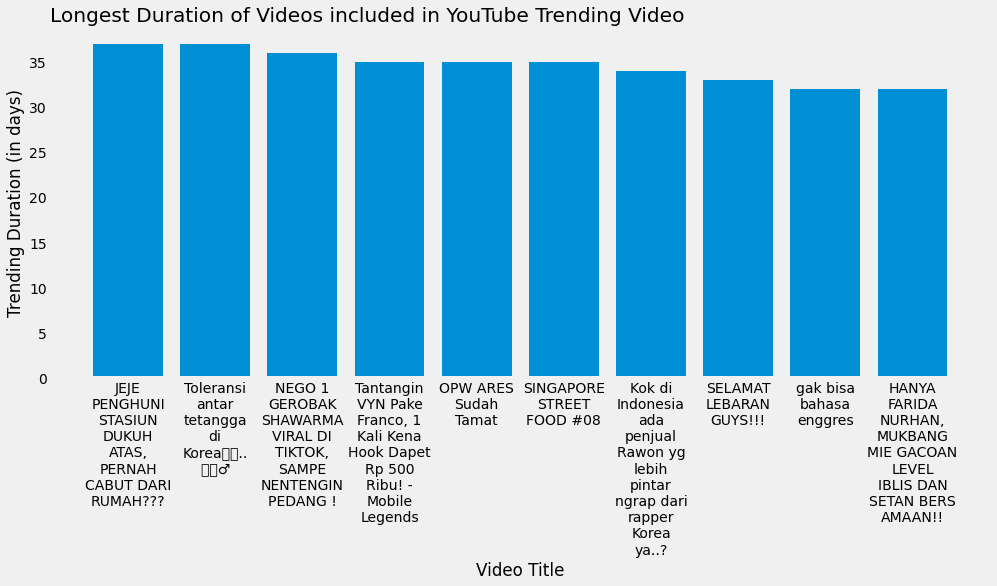

In [14]:
# Visuatisasi data trending dengan chart bar

plt .figure(figsize=(15, 6))
plt.bar(
    trending_duration.title[:10].apply(lambda title: "\n".join(wrap(title, width=10))),
    trending_duration.trending_duration[:10]
)
plt.title("Longest Duration of Videos included in YouTube Trending Video", loc="left")
plt.xlabel("Video Title")
plt.ylabel("Trending Duration (in days)")
plt.grid(False)
plt.show()

In [15]:
trending_by_title = filtered_trending.groupby("title")
trending_rewind = trending_by_title[["view", "like", "dislike"]].agg(["min", "max", "mean", "sum"])
trending_rewind

view             \
                                                          min        max   
title                                                                      
"Awalnya Diserang Bertubi tubi" Lihatlah Bagaim...   101823.0   121044.0   
"BABY R" BIKIN GEMES !!! RAFATHAR CEMBURU, SEMU...  2280620.0  2637486.0   
"Emosi Rico Simanjutak" Saat Taisei Marukawa Be...    72434.0   116310.0   
"Grebek rumah harris vriza, dan percintaannya d...    68879.0   163773.0   
"Hellevator" Band Cover By Xdinary Heroes (원곡 :...   393043.0  1348612.0   
...                                                       ...        ...   
🥘Yuk! Kita coba in! Let’s eat | WayV’s ONE-DAY ...   148668.0   680210.0   
🥰 New Gadgets & Versatile Utensils For Home # 2...   330156.0  7334655.0   
🥰 New Gadgets & Versatile Utensils For Home # 3...   278942.0  1212522.0   
🥰 New Gadgets & Versatile Utensils For Home # 3...   320084.0  1097903.0   
🩸괴담회에 어서오세요🩸: 첫 번째 이야기 | WELCOME TO NCT’S HORRO...  1423178.0  2966798.0   

                                                                              \
                                                            mean         sum   
title                                                                          
"Awalnya Diserang Bertubi tubi" Lihatlah Bagaim...  1.114335e+05    222867.0   
"BABY R" BIKIN GEMES !!! RAFATHAR CEMBURU, SEMU...  2.459053e+06   4918106.0   
"Emosi Rico Simanjutak" Saat Taisei Marukawa Be...  9.390625e+04    375625.0   
"Grebek rumah harris vriza, dan percintaannya d...  1.267565e+05    760539.0   
"Hellevator" Band Cover By Xdinary Heroes (원곡 :...  1.126182e+06  14640369.0   
...                                                          ...         ...   
🥘Yuk! Kita coba in! Let’s eat | WayV’s ONE-DAY ...  5.519997e+05   8831995.0   
🥰 New Gadgets & Versatile Utensils For Home # 2...  3.414214e+06  34142143.0   
🥰 New Gadgets & Versatile Utensils For Home # 3...  7.948737e+05   5564116.0   
🥰 New Gadgets & Versatile Utensils For Home # 3...  7.562497e+05   4537498.0   
🩸괴담회에 어서오세요🩸: 첫 번째 이야기 | WELCOME TO NCT’S HORRO...  2.629831e+06  36817634.0   

                                                        like            \
                                                         min       max   
title                                                                    
"Awalnya Diserang Bertubi tubi" Lihatlah Bagaim...    1336.0    1456.0   
"BABY R" BIKIN GEMES !!! RAFATHAR CEMBURU, SEMU...   93348.0  101207.0   
"Emosi Rico Simanjutak" Saat Taisei Marukawa Be...     990.0    1432.0   
"Grebek rumah harris vriza, dan percintaannya d...    5529.0    8714.0   
"Hellevator" Band Cover By Xdinary Heroes (원곡 :...  127824.0  262846.0   
...                                                      ...       ...   
🥘Yuk! Kita coba in! Let’s eat | WayV’s ONE-DAY ...   39847.0  101922.0   
🥰 New Gadgets & Versatile Utensils For Home # 2...    2822.0   58066.0   
🥰 New Gadgets & Versatile Utensils For Home # 3...    2790.0   10212.0   
🥰 New Gadgets & Versatile Utensils For Home # 3...    3025.0    8759.0   
🩸괴담회에 어서오세요🩸: 첫 번째 이야기 | WELCOME TO NCT’S HORRO...  316849.0  457809.0   

                                                                              \
                                                             mean        sum   
title                                                                          
"Awalnya Diserang Bertubi tubi" Lihatlah Bagaim...    1396.000000     2792.0   
"BABY R" BIKIN GEMES !!! RAFATHAR CEMBURU, SEMU...   97277.500000   194555.0   
"Emosi Rico Simanjutak" Saat Taisei Marukawa Be...    1228.500000     4914.0   
"Grebek rumah harris vriza, dan percintaannya d...    7486.833333    44921.0   
"Hellevator" Band Cover By Xdinary Heroes (원곡 :...  237112.769231  3082466.0   
...                                                           ...        ...   
🥘Yuk! Kita coba in! Let’s eat | WayV’s ONE-DAY ...   87227.125000  1395634.0   
🥰 New Gadgets & Versatile Utensils

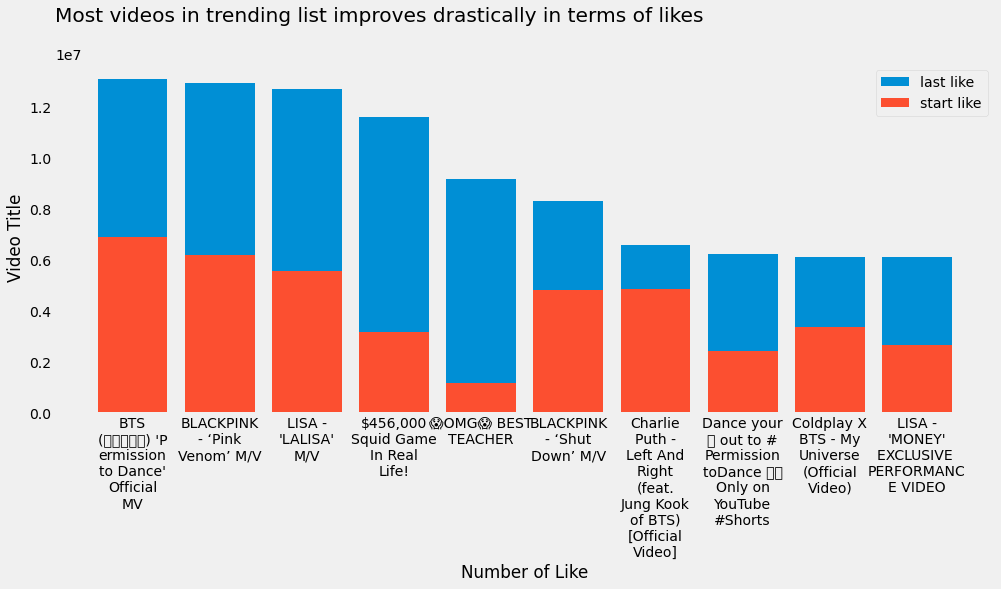

In [16]:
#VisuaLisosi Trending video terotas mosingz

top_10_liked = trending_rewind["like"].sort_values("max", ascending=False).iloc[:10]
plt.figure(figsize=(15, 6))
plt.bar(
    top_10_liked.index.to_series().apply(lambda title: "\n".join(wrap(title, width=10))),
    top_10_liked["max"],
    label="last like"
)
plt.bar(
    top_10_liked.index.to_series().apply(lambda title: "\n".join(wrap(title, width=10))),
    top_10_liked["min"],
    label="start like"
)
plt.title("Most videos in trending list improves drastically in terms of likes", loc="left", y=1.1)
plt.xlabel("Number of Like")
plt.ylabel("Video Title")
plt.legend()
plt.grid(False)
plt.show()

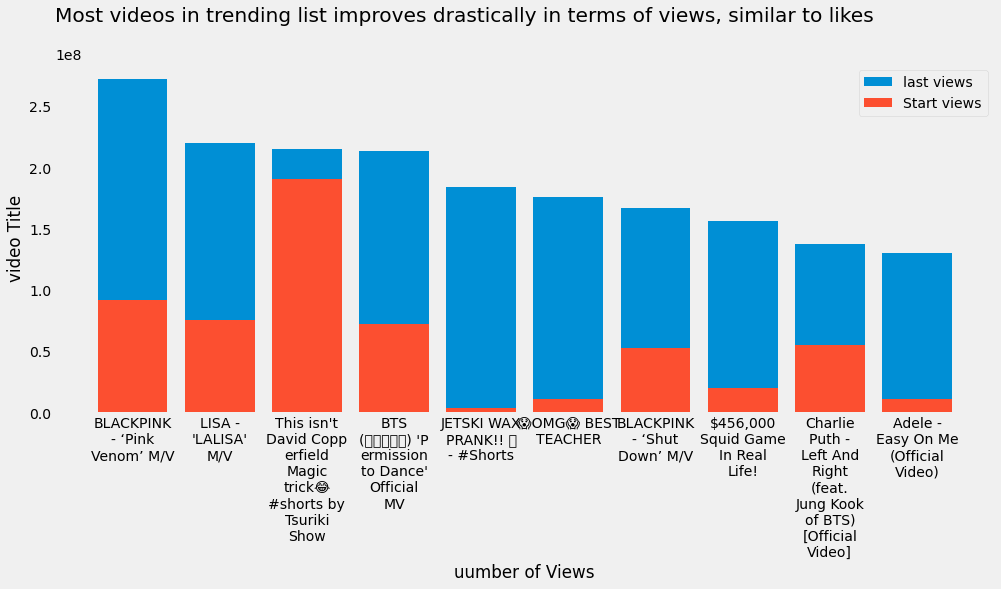

In [17]:
top_10_viewed = trending_rewind["view"].sort_values("max", ascending=False).iloc[:10]
plt.figure(figsize=(15, 6))
plt.bar(
    top_10_viewed.index.to_series().apply(lambda title: "\n".join(wrap(title, width=10))),
    top_10_viewed["max"],
    label="last views"
)
plt.bar(
    top_10_viewed.index.to_series().apply(lambda title: "\n".join(wrap(title, width=10))),
    top_10_viewed["min"],
    label="Start views"
)
plt.title("Most videos in trending list improves drastically in terms of views, similar to likes", loc="left", y=1.1)
plt.xlabel("uumber of Views")
plt.ylabel("video Title")
plt.legend()
plt.grid(False)
plt.show()

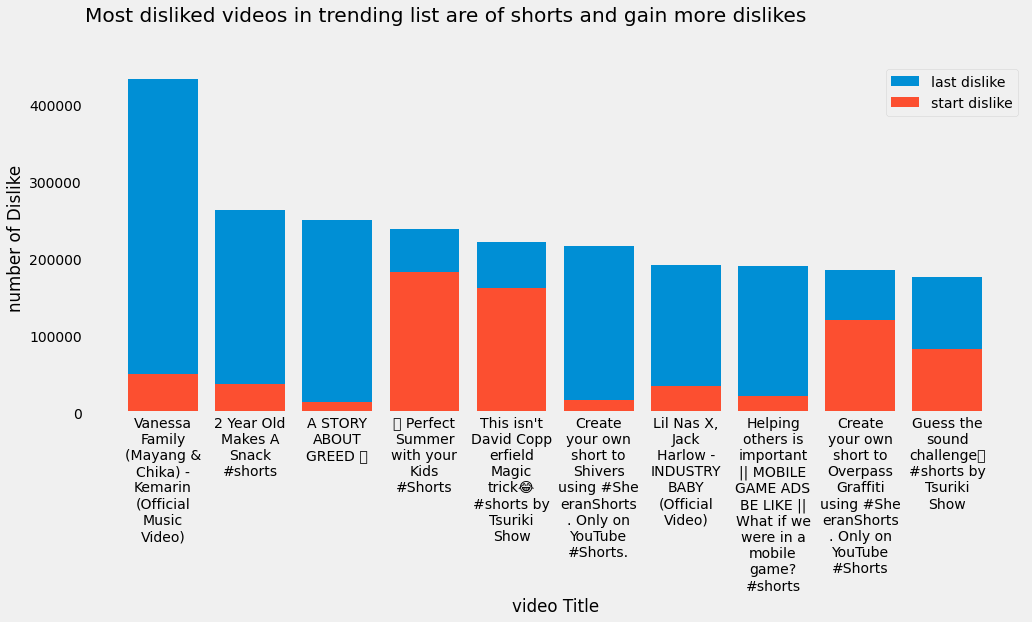

In [18]:
top_10_disliked = trending_rewind["dislike"].sort_values("max", ascending=False).iloc[:10]
plt.figure(figsize=(15, 6))
plt.bar(
    top_10_disliked.index.to_series().apply(lambda title: "\n".join(wrap(title, width=10))),
    top_10_disliked["max"],
    label="last dislike"
)
plt.bar(
    top_10_disliked.index.to_series().apply(lambda title: "\n".join(wrap(title, width=10))),
    top_10_disliked["min"],
    label="start dislike"
)
plt.title("Most disliked videos in trending list are of shorts and gain more dislikes", loc="left", y=1.1)
plt.ylabel("number of Dislike")
plt.xlabel("video Title")
plt.legend()
plt.grid(False)
plt.show()

In [19]:
# Sebagai contoh, perhatikan sampeL juduL dan deskripsi video berikut.
sample = filtered_trending.sample(10, random_state=11)
sample[["title", "description"]]

,title,description
50234,MAN CITY 3-0 EVERTON | PREMIER LEAGUE HIGHLIGHTS,Everton fell to defeat at Manchester City in a...
22694,Idgitaf - Berlagak Bahagia (Official Lyric Video),Berlagak Bahagia (Official Lyric Video)\nStrea...
93064,Seharian ngerasain kerjaan jadi SALES HP!,Boleh hape murah kaka...\n\nBarang bekas revie...
47387,UPDATE TERBARU VERSI 1.038.85!! MOTOR BARU LAN...,Hello guys..kita lanjut lagi main Sakura Schoo...
37865,Persaingan Pedagang Bakso – tebar tanah kubura...,Join this channel to get access to perks:\nhtt...
103946,"Melly Goeslaw, Lesti, Nagita Slavina, Celine E...","RUMAH KITA - MELLY GOESLAW, NAGITA SLAVINA, LE..."
53471,"KISAH HARU RUMINI, Meninggal Berpelukan Bersam...","SURYA.co.id, LUMAJANG - Korban meninggal letus..."
103941,EPIC Leon Edwards' coaches inspire him to incr...,Leon Edwards did the unthinkable by defeating ...
42589,TANTANGAN MENGHIAS KEIK || Putar Roda Misterin...,"Kalau kita membayangkan keik, kita pasti ngeba..."
107739,Teaser | Percy Jackson and the Olympians | Dis...,"For more updates, subscribe to Disney, Pixar, ..."


In [20]:
# Merubah title dan descripsi video menjadi Lowercase
sample["title_lang"] = sample.title.apply(lambda title: langdetect.detect(title.lower()))
sample["desc_lang"] = sample.description.apply(lambda desc: langdetect.detect(desc.lower()))

In [21]:
with pd.option_context("display.max_colwidth", 100):
  display(sample[["title", "title_lang", "description", "desc_lang"]])

,title,title_lang,description,desc_lang
50234,MAN CITY 3-0 EVERTON | PREMIER LEAGUE HIGHLIGHTS,en,Everton fell to defeat at Manchester City in a difficult afternoon at Etihad Stadium. Raheem Ste...,en
22694,Idgitaf - Berlagak Bahagia (Official Lyric Video),en,"Berlagak Bahagia (Official Lyric Video)\nStream ""Berlagak Bahagia"" in your favorite platform: ht...",en
93064,Seharian ngerasain kerjaan jadi SALES HP!,id,Boleh hape murah kaka...\n\nBarang bekas review biasanya saya jual disini: https://invol.co/cl75...,id
47387,UPDATE TERBARU VERSI 1.038.85!! MOTOR BARU LANGSUNG BUAT BALAPAN!! SAKURA SCHOOL SIMULATOR-PART 494,id,Hello guys..kita lanjut lagi main Sakura School Part 494 yaa. Kali ini Sakurani Review UPDATE T...,id
37865,Persaingan Pedagang Bakso – tebar tanah kuburan agar bangkrut #HORORMISTERI | Kartun hantu pocong,id,Join this channel to get access to perks:\nhttps://www.youtube.com/channel/UC7GWXKxiy9_AU9TytEh0...,id
103946,"Melly Goeslaw, Lesti, Nagita Slavina, Celine Evangelista - Rumah Kita | Official Music Video",it,"RUMAH KITA - MELLY GOESLAW, NAGITA SLAVINA, LESTI, CELINE EVANGELISTA\n#RumahKita #PulihLebihCep...",id
53471,"KISAH HARU RUMINI, Meninggal Berpelukan Bersama Ibunya Digulung Wedhus Gembel Semeru",id,"SURYA.co.id, LUMAJANG - Korban meninggal letusan Semeru mulai ditemukan. Dua di antaranya adalah...",id
103941,EPIC Leon Edwards' coaches inspire him to incredible comeback win! | Usman v Edwards 2 | UFC 278,en,Leon Edwards did the unthinkable by defeating Kamaru Usman and becoming the UFC welterweight Cha...,en
42589,TANTANGAN MENGHIAS KEIK || Putar Roda Misterinya! 100 Lapis MAKANAN oleh 123 GO! CHALLENGE,id,"Kalau kita membayangkan keik, kita pasti ngebayangin berlapis-lapis dengan cokelat manis, tabura...",id
107739,Teaser | Percy Jackson and the Olympians | Disney+,en,"For more updates, subscribe to Disney, Pixar, Marvel, Star Wars, and National Geographic.\n \nDi...",en


In [22]:
# Pertama, kita akan buat fangsi yang akan mendeteksi bahasa dari sebuah teks sebagai berikut.
def detect_language(text):
    """Detect language of the 'text'."""
    try:
        lang = langdetect.detect(text)
        return lang
    except:
        return

In [23]:
# Pertama, kita akan buat fangsi yang akan mendeteksi bahasa dari sebuah teks sebagai berikut.
def detect_language(text):
    """Detect language of the 'text'."""
    try:
        lang = langdetect.detect(text)
        return lang
    except:
        return

filtered_trending["title_lang"] = filtered_trending["title"].apply(detect_language)
filtered_trending["desc_lang"] = filtered_trending["description"].apply(detect_language)
filtered_trending[["title", "title_lang","description", "desc_lang"]]

,title,title_lang,description,desc_lang
21322,NCT DREAM 엔시티 드림 'Hello Future' MV,it,"NCT DREAM's 1st Album Repackage ""Hello Future""...",en
21323,PART 3 // SUTRISNO DAN ENDANG BAHAGIA,de,Find me on sosial media :\n\nInstagram : https...,en
21324,This isn't David Copperfield Magic trick😂 #sho...,en,Thank you for watching.\nSubscribe to Tsuriki ...,en
21325,Rizky Billar - Pemimpinmu | Official Music Video,en,Rizky Billar - Pemimpinmu | Official Music Vid...,id
21326,Ini Pengakuan Pengemudi Pajero usai Rusak dan ...,id,Polisi menangkap pengemudi SUV yang merusak da...,id
...,...,...,...,...
118746,NASI GORENG BAKAR INI PINDAH SAMPAI 13 KALI KA...,de,HAHHH JUALAN NASI GORENG INI UDAH 13 KALI PIND...,id
118747,"KENAL DEKAT DENGAN KELUARGA NATHALIE, PAPA SAY...",de,"Hi, welcome to Nathalie Holscher Channel!\n\nF...",id
118748,YOUNITE 'Bad Cupid' M/V,en,YOUNITE 'Bad Cupid' M/V\n\n'YOUNI-ON' Availabl...,en
118749,Cover | JAEHYUN - Can't Take My Eyes Off You (...,en,#Cover #JAEHYUN\n#CantTakeMyEyesOffYou #Franki...,en


In [ ]:
#filtered_trending["title_lang"] : filtered_trending["title"].apply(detect_language)
#filtered_trending["desc_lang"] = filtered_trending["description"].apply(detect_language)

In [24]:
indo_trending = filtered_trending.loc[ 
 (filtered_trending.title_lang == "id") | (filtered_trending.desc_lang == "id") 
] 

with pd.option_context("display.max_columns", None): 
 display(indo_trending.sample(10))

,video_id,publish_time,channel_id,title,description,thumbnail_url,thumbnail_width,thumbnail_height,channel_name,tags,category_id,live_status,local_title,local_description,duration,dimension,definition,caption,license_status,allowed_region,blocked_region,view,like,dislike,favorite,comment,trending_time,title_lang,desc_lang
26079,NaN,2021-07-23 12:18:18+00:00,UCRXKyOCd51WBY0IumfWZZsQ,KRONOLOGI | Kasus Pembunuhan di Jalan Subur ...,Diduga karena permasalahan sepeda motor kredit...,NaN,NaN,NaN,TRIBUNBALI,"['tribunbali', 'videoviral', 'updateberita', '...",25,none,KRONOLOGI | Kasus Pembunuhan di Jalan Subur ...,Diduga karena permasalahan sepeda motor kredit...,PT2M22S,2d,hd,False,True,NaN,NaN,15282.0,115.0,8.0,0,33.0,2021-07-24 06:02:49.630446+00:00,id,id
102440,Fa_rNR__UV0,2022-08-17 12:45:00+00:00,UCJpxfn2SxQ6NyH_lkvqitpQ,Wonderland Indonesia 2 : The Sacred Nusantara ...,Wonderland Indonesia II - “The Sacred Nusantar...,https://i.ytimg.com/vi/Fa_rNR__UV0/hqdefault.jpg,480.0,360.0,Alffy Rev,"['wonderland indonesia 2', 'the sacred nusanta...",10,none,Wonderland Indonesia 2 : The Sacred Nusantara ...,Wonderland Indonesia II - “The Sacred Nusantar...,PT16M57S,2d,hd,False,True,NaN,NaN,8223559.0,1088870.0,NaN,0,93586.0,2022-08-30 06:02:55.034876+00:00,en,id
102783,8su2-0SAe_c,2022-08-30 12:45:00+00:00,UC3J4Q1grz46bdJ7NJLd4DGw,Cesar Datang Lagi Guys Gawat - Bakso Simulator...,Ayo kita selesaikan Chapter 3 di game Bakso Si...,https://i.ytimg.com/vi/8su2-0SAe_c/hqdefault.jpg,480.0,360.0,MiawAug,"['MiawAug', 'Bakso Simulator', 'Bakso Simulato...",20,none,Cesar Datang Lagi Guys Gawat - Bakso Simulator...,Ayo kita selesaikan Chapter 3 di game Bakso Si...,PT18M31S,2d,hd,False,True,NaN,NaN,440293.0,23432.0,NaN,0,1587.0,2022-09-01 06:01:39.457905+00:00,id,id
42202,NaN,2021-10-07 06:00:11+00:00,UCfine-VxsozjW6FnssQkwLg,ABAL-ABAL?!! BIMA ARYO BUKTIKAN BERHASIL BUAT ...,Alohaaa semua! Selamat datang di Ivan Gunawan ...,NaN,NaN,NaN,Ivan Gunawan,"['ivan gunawan', 'igun', 'podcast', 'how to', ...",24,none,ABAL-ABAL?!! BIMA ARYO BUKTIKAN BERHASIL BUAT ...,Alohaaa semua! Selamat datang di Ivan Gunawan ...,PT38M58S,2d,hd,False,True,NaN,NaN,798126.0,20547.0,399.0,0,1031.0,2021-10-13 06:01:17.448266+00:00,en,id
110934,Vl8FZ7okQaI,2022-09-23 06:00:08+00:00,UCepgnl-TtJ8DurHdC6EE22w,HELLO SURABAYA #02,"Aaaaaaaaaa\nGimana kabarnya kalian?\n\nBtw, ka...",https://i.ytimg.com/vi/Vl8FZ7okQaI/hqdefault.jpg,480.0,360.0,Ria SW,NaN,24,none,HELLO SURABAYA #02,"Aaaaaaaaaa\nGimana kabarnya kalian?\n\nBtw, ka...",PT18M45S,2d,hd,False,True,NaN,NaN,1459750.0,65598.0,NaN,0,2305.0,2022-10-11 06:02:17.546275+00:00,pt,id
105257,1yX-EJn_l6c,2022-09-03 09:01:51+00:00,UCmtAg_U0wvmWdxTlceISdEw,"Review Skin MIYA Collector, Gila Efeknya Terla...",Contact for business: \njoforbusiness20@gmail....,https://i.ytimg.com/vi/1yX-EJn_l6c/hqdefault.jpg,480.0,360.0,Jonathan Liandi,"['MOBILELEGENDS', 'MOBILELEGENDSINDONESIA', 'M...",20,none,"Review Skin MIYA Collector, Gila Efeknya Terla...",Contact for business: \njoforbusiness20@gmail....,PT21M41S,2d,hd,False,True,NaN,NaN,802905.0,22106.0,NaN,0,1137.0,2022-09-13 06:01:26.812573+00:00,en,id
34381,NaN,2021-09-02 04:00:12+00:00,UCuKBrPMWsTAtbTAxy7MaOCA,MENUNGGU - Tasya Rosmala ft Ageng Music (Offic...,Official Live Music from Tasya Rosmala ft Agen...,NaN,NaN,NaN,Ageng Music Official,"['menunggu', 'tasya rosmala', 'tasya rosmala m...",10,none,MENUNGGU - Tasya Rosmala ft Ageng Music (Offic...,Official Live Music from Tasya Rosmala ft Agen...,PT7M40S,2d,hd,False,True,NaN,NaN,351399.0,6691.0,180.0,0,2244.0,2021-09-04 06:00:53.073334+00:00,en,id
112766,zvauR9lVAHY,2022-10-20 14:31:12+00:00,UCzTsWuCdVP_vehWyGwPcS3Q,Kang Gobang Sangat Rindu Suasana Terminal - PR...,Kang Gobang sepertinya sudah sangat rindu deng...,https://i.ytimg.com/vi/zvauR9lVAHY/hqdefault.jpg,480.0,360.0,RCTI - LAYAR DRAMA INDONESIA,"['Preman Pensiun 6', 'Preman Pensiun', 'Epy Ku...",24,none,Kang Gobang Sangat Rindu Suasana Terminal - PR...,Kang Gobang sepertinya sudah sangat rindu

In [25]:
data = indo_trending[["title", "description", "category_id"]].reset_index(drop=True)
data 

,title,description,category_id
0,Rizky Billar - Pemimpinmu | Official Music Video,Rizky Billar - Pemimpinmu | Official Music Vid...,10
1,Ini Pengakuan Pengemudi Pajero usai Rusak dan ...,Polisi menangkap pengemudi SUV yang merusak da...,25
2,Aksi Demo Tolak Kedatangan Jokowi di Kendari B...,Tanggal Tayang: 30/06/2021\n\nProgram berita h...,25
3,"PERTAMA KALI LIAT SAPI SEGEDE GINI, DINAIKIN D...",Assalamualaikum gaeess..! sudah nonton video s...,15
4,PODKESMAS SAMPAI GA NYAMAN DIBAHAS DISINI - To...,Talk show malam yang akan memberikan informasi...,24
...,...,...,...
37989,HUBUNGAN BUAYA BESAR “RISKA” DAN PAK AMBO DI L...,Terimakasih @fitriyani RISKA dan Masyarakat ko...,15
37990,Farel Prayoga Feat Dini Kurnia _CINTA TAK TERP...,Farel Prayoga Feat Dini Kurnia _CINTA TAK TERP...,10
37991,NASI GORENG BAKAR INI PINDAH SAMPAI 13 KALI KA...,HAHHH JUALAN NASI GORENG INI UDAH 13 KALI PIND...,22
37992,"KENAL DEKAT DENGAN KELUARGA NATHALIE, PAPA SAY...","Hi, welcome to Nathalie Holscher Channel!\n\nF...",24


In [ ]:
data.drop_duplicates(subset="title", inplace=True)

In [26]:
data.reset_index(drop=True, inplace=True) 
data.shape

(37994, 3)

In [27]:
# list_emoji = [e for e in emoji.distinct_emoji_list(test)]
# from emoji import UNICODE_EMOJI
emojis = sorted(emoji.EMOJI_DATA, key=len, reverse=True)
emojis

list_emoji = [e for e in emoji.EMOJI_DATA]
# list_emoji
count = 0
for em in emojis:
    for title in data.title:
        if em in title:
            count += 1

print ("how many titles use emoji?", count)

how many titles use emoji? 4257


In [28]:
def demojize(text):
    for em in list_emoji:
        if em in text:
            em_text = emoji.demojize(em)
            text = text.replace(em, " " + em_text + " ")
    return text

In [29]:
data["title_emoji"] = data.title.apply(demojize)

In [30]:
title_with_emoji_idx = [ 
 idx for idx in range(len(data.title)) 
 for em in list_emoji 
 if em in data.loc[idx, "title"] 
] 

In [31]:
with pd.option_context("display.max_colwidth", 100): 
 display(data.loc[title_with_emoji_idx]) 

,title,description,category_id,title_emoji
34,Dari Jendela Smp : GREGETTT...Wih kelihatannya Wulan jadi primadona di SMA Merdeka Mandiri nih...❤,Saksikan #DariJendelaSMP Setiap Hari Pkl. 16.40 WIB hanya di @Surya Citra Televisi (SCTV) \n@sin...,24,Dari Jendela Smp : GREGETTT...Wih kelihatannya Wulan jadi primadona di SMA Merdeka Mandiri nih.....
79,BIKIN CEWEK TERPESONA 😍 Aksi Heroik Driver Muda Menolong Sopir Yang Kesulitan di Sitinjau Lauik,Aksi heroik driver muda membantu sopir minibus yang kesulitan di Sitinjau Lauik\n\ninstagram : h...,2,BIKIN CEWEK TERPESONA :smiling_face_with_heart-eyes: Aksi Heroik Driver Muda Menolong Sopir Ya...
80,15 MENIT MEMBAKAR LEMAK 1 Kg !!! 24 Jam TIMBANGAN TURUN ✅ ✅ ✅,"15 menit membakar lemak, ok ! siapa yg workout mengharapkan bisa membakar 1 kg lemak dalam 15 me...",26,15 MENIT MEMBAKAR LEMAK 1 Kg !!! 24 Jam TIMBANGAN TURUN :check_mark_button: :check_mark_butto...
159,Dari Jendela Smp : GREGETTT...Wih kelihatannya Wulan jadi primadona di SMA Merdeka Mandiri nih...❤,Saksikan #DariJendelaSMP Setiap Hari Pkl. 16.40 WIB hanya di @Surya Citra Televisi (SCTV) \n@sin...,24,Dari Jendela Smp : GREGETTT...Wih kelihatannya Wulan jadi primadona di SMA Merdeka Mandiri nih.....
166,BIKIN CEWEK TERPESONA 😍 Aksi Heroik Driver Muda Menolong Sopir Yang Kesulitan di Sitinjau Lauik,Aksi heroik driver muda membantu sopir minibus yang kesulitan di Sitinjau Lauik\n\ninstagram : h...,2,BIKIN CEWEK TERPESONA :smiling_face_with_heart-eyes: Aksi Heroik Driver Muda Menolong Sopir Ya...
...,...,...,...,...
37932,KULINER DI PASAR BARU! MIE TERENAK SEUMUR HIDUP😭💖,Social Media:\nhttps://www.youtube.com/jessicajane99\nhttps://www.instagram.com/jessicajane99\nh...,24,KULINER DI PASAR BARU! MIE TERENAK SEUMUR HIDUP :loudly_crying_face: :sparkling_heart:
37942,NEKAD ‼️ TIM DEHAKIMS EVAKUASI BUAYA,#dehakimschannel #buaya #panjipetualang #rescue #crocodile #aligator \n\nIni adalah pengalaman p...,15,NEKAD :double_exclamation_mark: TIM DEHAKIMS EVAKUASI BUAYA
37942,NEKAD ‼️ TIM DEHAKIMS EVAKUASI BUAYA,#dehakimschannel #buaya #panjipetualang #rescue #crocodile #aligator \n\nIni adalah pengalaman p...,15,NEKAD :double_exclamation_mark: TIM DEHAKIMS EVAKUASI BUAYA
37981,Apa kodok Indonesia kodok atlet...? Paha kodoknya berotot banget...!🙀🙀,#Semarang#Kodok#두꺼비요리\nMukbang makanan unik-unik di Semarang!\n\nWarung Makan Asem-Asem Koh Liem...,24,Apa kodok Indonesia kodok atlet...? Paha kodoknya berotot banget...! :weary_cat: :weary_cat:


In [32]:
# Delete kolom title 
data.drop(columns="title", inplace=True) 

In [33]:
desc_with_emoji_idx = [ 
 idx for idx in range(len(data.description)) 
 for em in list_emoji 
 if em in data.loc[idx, "description"] 
] 
data["desc_emoji"] = data.description.apply(demojize) 
with pd.option_context("display.max_colwidth", 100): 
 display(data.loc[desc_with_emoji_idx]) 

,description,category_id,title_emoji,desc_emoji
0,Rizky Billar - Pemimpinmu | Official Music Video\n\nSurprise Untuk Dede Lesti :\nhttps://youtu.b...,10,Rizky Billar - Pemimpinmu | Official Music Video,Rizky Billar - Pemimpinmu | Official Music Video\n\nSurprise Untuk Dede Lesti :\nhttps://youtu.b...
8,#LestiBawaAkuKePenghulu #Lesti #MusicVideo #LiveAcoustic\n\nAura bahagia semakin terpancar denga...,10,Lesti - Bawa Aku Ke Penghulu | Live Acoustic Version,#LestiBawaAkuKePenghulu #Lesti #MusicVideo #LiveAcoustic\n\nAura bahagia semakin terpancar denga...
11,"Title: Sempurnakan Hariku \nArtist: Rey Mbayang\nComposser: Rey Mbayang, Trakast\nMusic Arranger...",10,Rey Mbayang - Sempurnakan Hariku (Official Music Video),"Title: Sempurnakan Hariku \nArtist: Rey Mbayang\nComposser: Rey Mbayang, Trakast\nMusic Arranger..."
12,Title: Apa Kabar Mantan\nArtist: Yeni Inka\nSongwriter: Yonanda NDX\n\nFollow juga kita disini y...,10,Yeni Inka - Apa Kabar Mantan (Official Music Video ANEKA SAFARI) | JOOX ORIGINAL,Title: Apa Kabar Mantan\nArtist: Yeni Inka\nSongwriter: Yonanda NDX\n\nFollow juga kita disini y...
12,Title: Apa Kabar Mantan\nArtist: Yeni Inka\nSongwriter: Yonanda NDX\n\nFollow juga kita disini y...,10,Yeni Inka - Apa Kabar Mantan (Official Music Video ANEKA SAFARI) | JOOX ORIGINAL,Title: Apa Kabar Mantan\nArtist: Yeni Inka\nSongwriter: Yonanda NDX\n\nFollow juga kita disini y...
...,...,...,...,...
37971,"Hello~\n\nKalian ada perkembangan apa seminggu kemarin?\n\n----\n\nKetika nulis ini, aku baru aj...",24,A NIGHT OUT IN TAMBLINGAN LAKE #06,"Hello~\n\nKalian ada perkembangan apa seminggu kemarin?\n\n----\n\nKetika nulis ini, aku baru aj..."
37971,"Hello~\n\nKalian ada perkembangan apa seminggu kemarin?\n\n----\n\nKetika nulis ini, aku baru aj...",24,A NIGHT OUT IN TAMBLINGAN LAKE #06,"Hello~\n\nKalian ada perkembangan apa seminggu kemarin?\n\n----\n\nKetika nulis ini, aku baru aj..."
37975,"Setelah menunggu hampir 1 tahun lamanya, akhirnya Honda Indonesia mewujudkan versi produksi dari...",2,Honda WR-V Indonesia 2022 [English subtitle],"Setelah menunggu hampir 1 tahun lamanya, akhirnya Honda Indonesia mewujudkan versi produksi dari..."
37988,- Subcribe Gratis : https://goo.gl/9DnNkc\n- Join TeguhTeam : https://www.youtube.com/channel/U...,20,AKU BIKIN ISTRIKU BAHAGIA DI PASAR MALAM MINECRAFT :face_savoring_food:,- Subcribe Gratis : https://goo.gl/9DnNkc\n- Join TeguhTeam : https://www.youtube.com/channel/U...


In [34]:
data.drop(columns="description", inplace=True)

In [35]:
data["all_text"] = data["title_emoji"] + " " + data["desc_emoji"] 

In [40]:
# data split 
X_train, X_dev, y_train, y_dev = train_test_split( 
 data["all_text"], data["category_id"], 
 test_size=.2, 
 stratify=data["category_id"], 
 random_state=11 
) 
training_size = X_train.shape[0] 
dev_size = X_dev.shape[0] 
print(f"{training_size = }.. {dev_size = }") 
# define vectorizer 
vectorizer = TfidfVectorizer( 
 min_df=.015, 
 max_df=.7, 
 ngram_range=(1, 1), 
) 
# generate tf-idf matrix 
train_tfidf = vectorizer.fit_transform(X_train) 
dev_tfidf = vectorizer.transform(X_dev) 
print("Got train tf-idf with shape:", train_tfidf.shape) 
print("Got dev tf-idf with shape:", dev_tfidf.shape) 
# convert to dataframe 
train_tfidf = pd.DataFrame(train_tfidf.toarray(), columns=vectorizer.get_feature_names_out()) 
dev_tfidf = pd.DataFrame(dev_tfidf.toarray(), columns=vectorizer.get_feature_names_out()) 

training_size = 3379.. dev_size = 845 


SyntaxError: ignored

In [39]:
with pd.option_context("display.max_columns", 100): 
 display(train_tfidf.sample(5)) 

NameError: ignored

In [41]:
dict_models = { 
 "logistic_regression": LogisticRegression(), 
 "naive_bayes": MultinomialNB(), 
 "svm": LinearSVC(random_state=11), 
 "decision_tree": DecisionTreeClassifier(random_state=11), 
 "random_forest": RandomForestClassifier(random_state=11) 
} 

In [42]:
for model in dict_models.values(): 
 print(f"-- {model.__class__.__name__} --") 
 model.fit(train_tfidf, y_train) 
 y_pred = model.predict(dev_tfidf) 
 print("Reports on dev set:", classification_report(y_dev, y_pred), sep="\n")

-- LogisticRegression --


NameError: ignored

In [44]:
svm_grid_search = GridSearchCV( 
 dict_models["svm"], 
 {"C": (10, 1, .1, .05, .01)}, 
) 
svm_grid_search.fit(train_tfidf, y_train) 
svm_pred_dev = svm_grid_search.predict(dev_tfidf) 
print("Reports on train set:", 
 classification_report( 
 y_train, 
 svm_grid_search.predict(train_tfidf) 
 ), sep="\n") 
print("Reports on dev set:", classification_report(y_dev, svm_pred_dev), sep="\n")

NameError: ignored

In [43]:
svm_grid_search.best_params_

NameError: ignored

In [45]:
random_forest_grid_search = GridSearchCV( 
 dict_models["random_forest"], 
 { 
 "n_estimators": (10, 20, 25, 50, 75, 100, 125), 
 "max_depth": (5, 10, 25, 50), 
 } 
) 
random_forest_grid_search.fit(train_tfidf, y_train) 
random_forest_pred = random_forest_grid_search.predict(dev_tfidf) 
print("Reports on train set:", 
 classification_report( 
 y_train, 
 random_forest_grid_search.predict(train_tfidf) 
 ), 
 sep="\n" 
) 
print("Reports on dev set:", classification_report(y_dev, random_forest_pred), sep="\n") 


NameError: ignored

In [46]:
random_forest_grid_search.best_params_

AttributeError: ignored

In [47]:
model = Pipeline([ 
 ("vectorizer", TfidfVectorizer( 
 min_df=.015, 
 max_df=.7, 
 ngram_range=(1, 1), 
 )), 
 ("model", RandomForestClassifier( 
 max_depth=50, 
 n_estimators=75, 
 random_state=11 
 )) 
]) 
# training 
model.fit(X_train, y_train) 
pred = model.predict(X_dev) 
print("Reports on train set:", 
 classification_report( 
 y_train, 
 model.predict(X_train) 
 ), 
 sep="\n" 
) 
print("Reports on dev set:", classification_report(y_dev, pred), sep="\n") 


NameError: ignored

In [48]:
joblib.dump(model, "D:/PTA 2016-2017/Modul/dataset/modelyt.joblib") 

FileNotFoundError: ignored

In [ ]:
model = joblib.load("D:/PTA 2016-2017/Modul/dataset/modelyt.joblib") 
print(model.get_params())

In [ ]:
preds = model.predict(X_dev) 
print(classification_report(y_dev, preds)) 